In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import uproot

input_directory = "/unix/chips/jtingey/production/beam_all/nuel/map/chips_1200"
image_size = [64, 64]
images = {
    "r_raw_hit_map_vtx": [], "r_raw_charge_map_vtx": [], "r_raw_time_map_vtx": [],
    "r_raw_hit_map_origin": [], "r_raw_charge_map_origin": [], "r_raw_time_map_origin": [],
    "r_raw_hit_map_iso": [], "r_raw_charge_map_iso": [], "r_raw_time_map_iso": [],
    "r_filtered_hit_map_vtx": [], "r_filtered_charge_map_vtx": [], "r_filtered_time_map_vtx": [],
    "r_filtered_hit_map_origin": [], "r_filtered_charge_map_origin": [], "r_filtered_time_map_origin": [],
    "r_filtered_hit_map_iso": [], "r_filtered_charge_map_iso": [], "r_filtered_time_map_iso": [],
    "r_filtered_hit_hough_map_vtx": []
}
hists = images

In [2]:
files = [os.path.join(input_directory, file) for file in os.listdir(input_directory)]

for file in files:
    file_u = uproot.open(file)
    true = file_u['true']
    reco = file_u['reco']
    
    for image_name in images.keys():
        images[image_name].extend(reco.array(image_name))

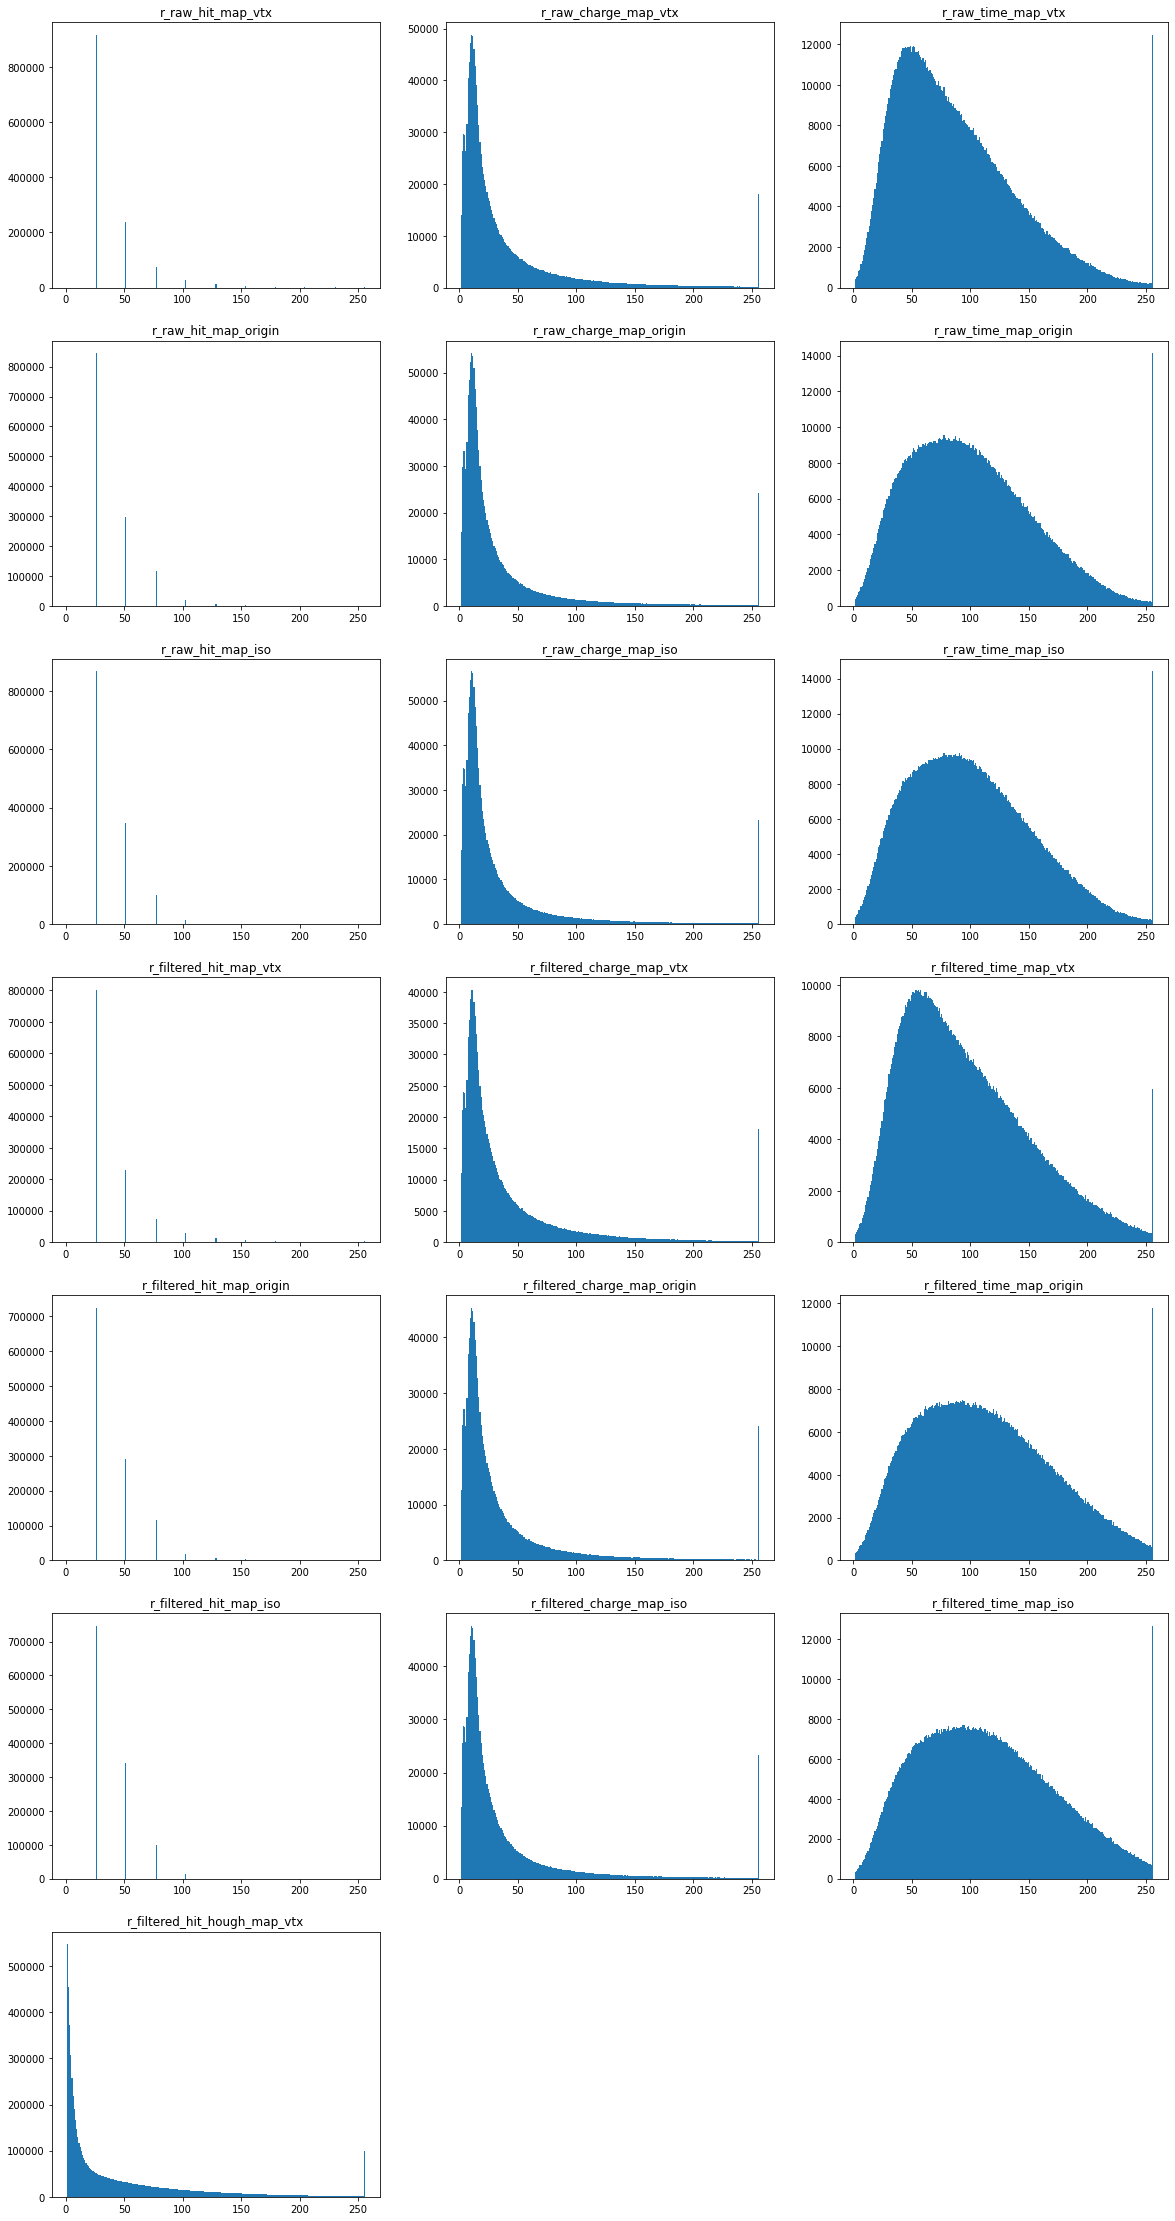

In [11]:
fig=plt.figure(figsize=(20, 40))
columns, rows = 3, 7
i = 1
for image_type in list(images.keys()):
    hist_data = []
    for event in images[image_type]:
        hist_data.append(event.reshape(4096))
    hist_data = np.concatenate(hist_data, axis=0)
    a = fig.add_subplot(rows, columns, i)
    plt.hist(hist_data, range=(1, 256), bins=255)
    a.set_title(image_type)
    i += 1

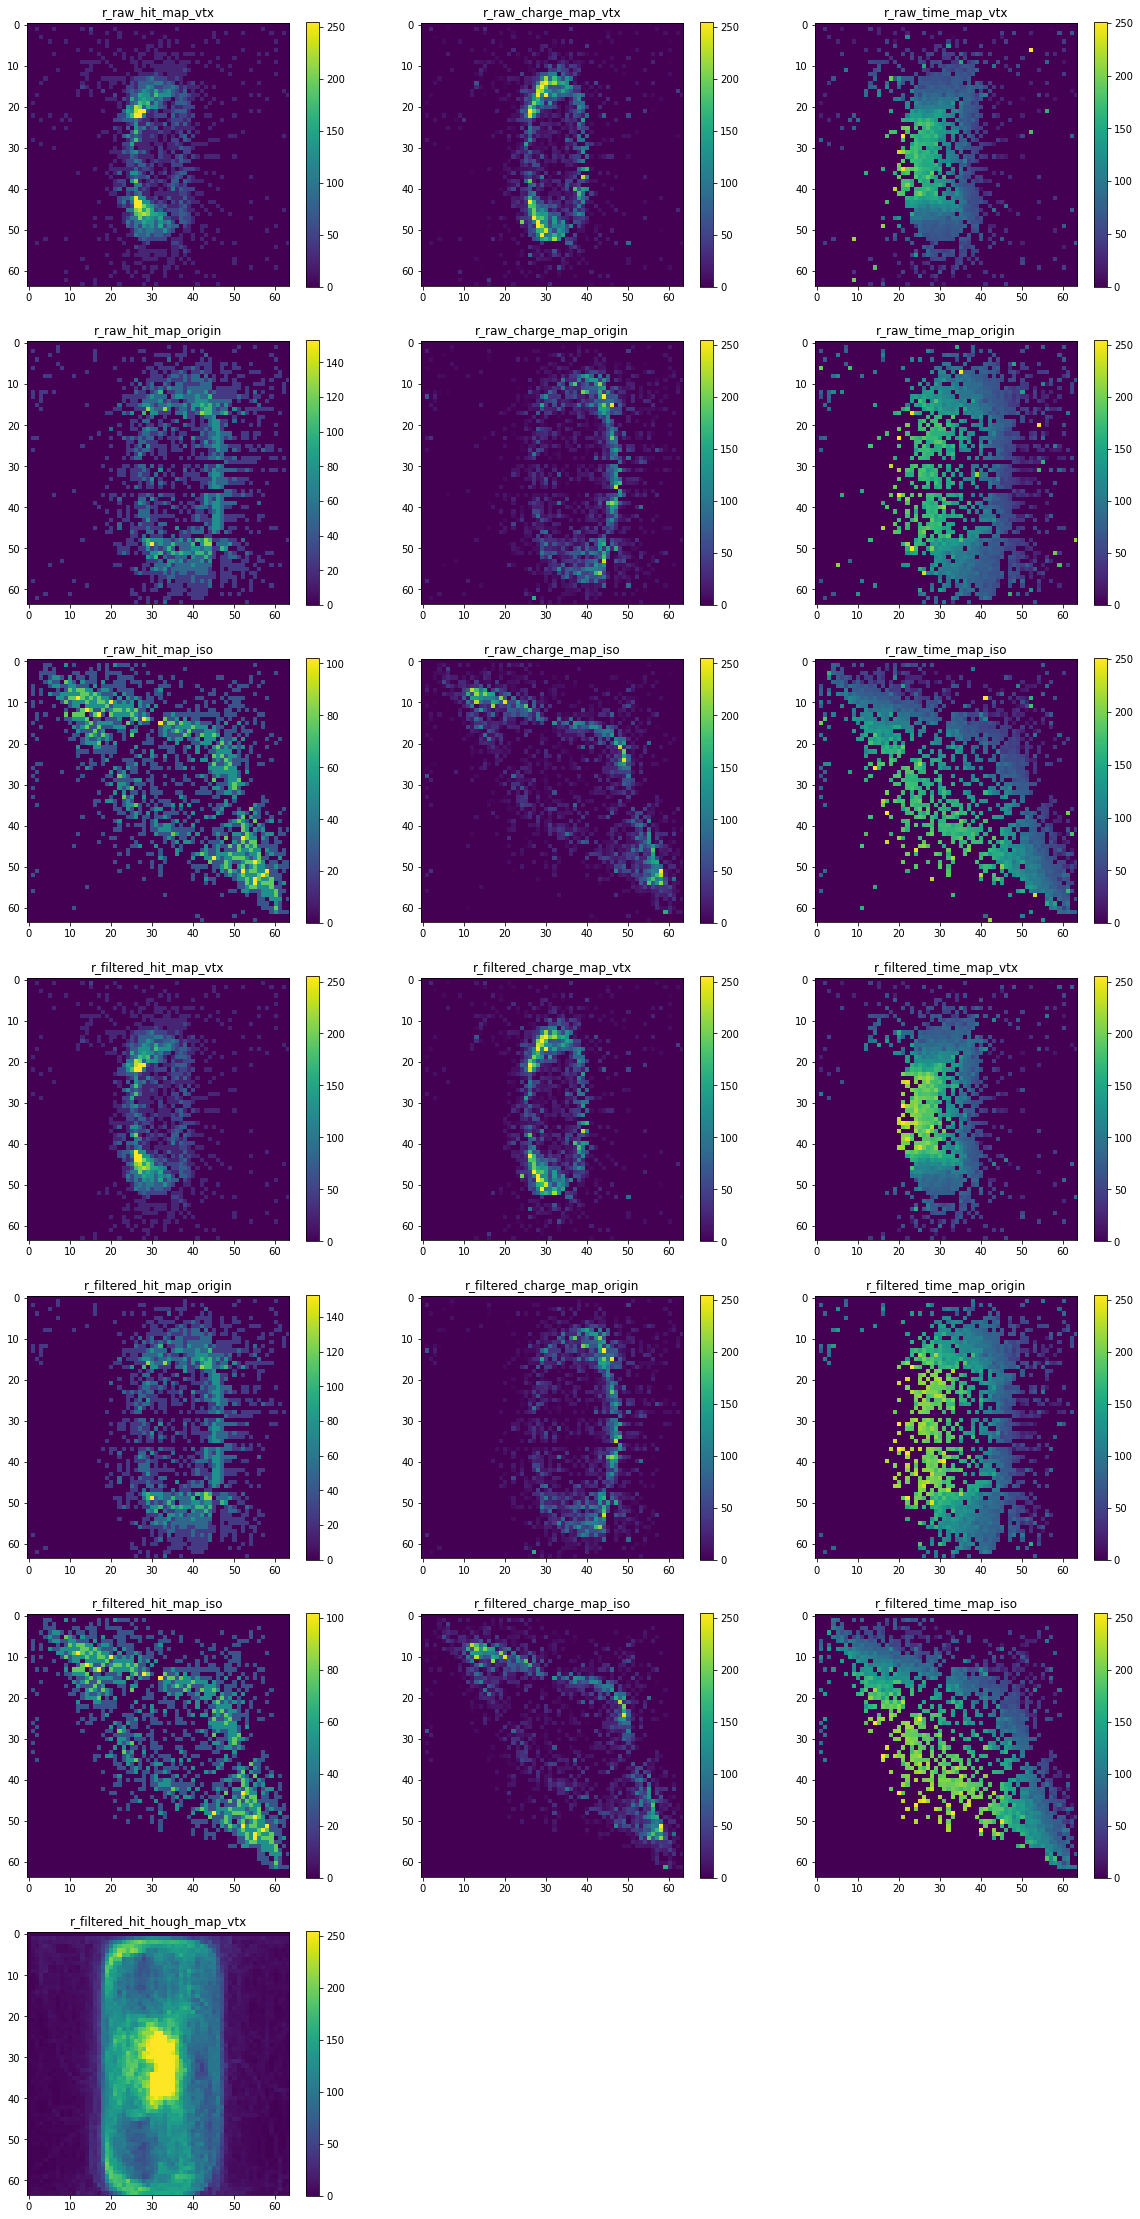

In [10]:
fig=plt.figure(figsize=(20, 40))
columns, rows = 3, 7
for i in range(1, len(images.keys())+1):
    a = fig.add_subplot(rows, columns, i)
    plt.imshow(images[list(images.keys())[i-1]][4])
    plt.colorbar()
    a.set_title(list(images.keys())[i-1])
    
plt.show()